Задание(10б) :
1. Поиграть с параметрами модели NN, обучить на выборке без середины. 

2. Есть прогноз для логарифма, нет прогноза для исходного ряда. Получить прогноз для исходнго ряда.
3. Нет окончательного графика. Построить. Добавить спрогнозированные значения на график

4. Сравнить с моделями. Получить таблицу

модель | NN | 
--- | ---
Прогноз |            
ошибка  |           









Данные о пассажирских авиаперевозках
Международные пассажирские авиаперевозки 
В тысячах человек, по месяцам
С января 1949 по декабрь 1960 года.
Название файла с данными series_g.csv


In [1]:
# Импорт matplotlib
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Импорт обучающей выборки
ser_g = pd.read_csv('series_g.csv', sep=';', header=0)


In [3]:
#  Знакомимся с данными
ser_g.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [4]:
#  Знакомимся с данными
ser_g.shape

(144, 2)

In [5]:
#  Знакомимся с данными
ser_g.tail()

,date,series_g
139,AUG 1960,606
140,SEP 1960,508
141,OCT 1960,461
142,NOV 1960,390
143,DEC 1960,432


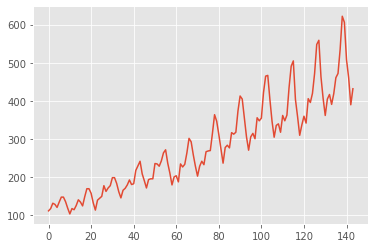

In [6]:
#  График. Что можно сказать?  
ser_g.iloc[:,1].plot()



Вывод: будем строить модель линейной регрессии для прогнозирования логарифма от объёма перевозок. 


In [7]:
#  Надо прогнозировать логарифм
ser_g['log_y'] = np.log10(ser_g['series_g'])

Text(0, 0.5, 'log10 от тысяч человек')

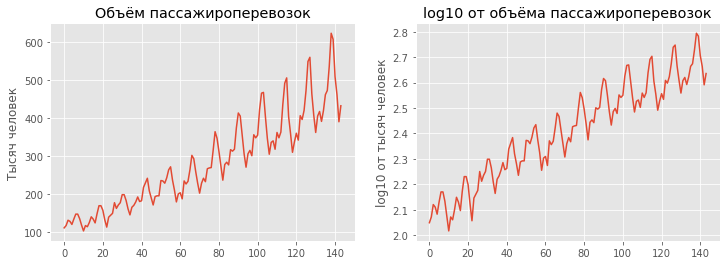

In [8]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ser_g['series_g'].plot(ax=ax1)
ax1.set_title(u'Объём пассажироперевозок')
ax1.set_ylabel(u'Тысяч человек')

ax2 = fig.add_subplot(122)
pd.Series(ser_g['log_y']).plot(ax=ax2)
ax2.set_title(u'log10 от объёма пассажироперевозок')
ax2.set_ylabel(u'log10 от тысяч человек')


In [9]:

#  Все хорошо?
ser_g.head()

,date,series_g,log_y
0,JAN 1949,112,2.049218
1,FEB 1949,118,2.071882
2,MAR 1949,132,2.120574
3,APR 1949,129,2.110590
4,MAY 1949,121,2.082785


In [10]:
# Преобразуем данные
# надо построить авторегрессию из временного ряда
# X: 1 ... 12 Y:13
# X1: 2,..., 13 Y:14

ser_g_2 = pd.DataFrame()

for i in range(12,0,-1):
    ser_g_2['t-'+str(i)] = ser_g.iloc[:,2].shift(i)

ser_g_2['t'] = ser_g.iloc[:,2].values

print(ser_g_2.head(13))




        t-12      t-11      t-10       t-9       t-8       t-7       t-6  \
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6        NaN       NaN       NaN       NaN       NaN       NaN  2.049218   
7        NaN       NaN       NaN       NaN       NaN  2.049218  2.071882   
8        NaN       NaN       NaN       NaN  2.049218  2.071882  2.120574   
9        NaN       NaN       NaN  2.049218  2.071882  2.120574  2.110590   
10       NaN       NaN  2.049218  2.071882  2.120574  2.110590  2.082785   
11       NaN  2.049218  2.071882  2.120574  2.110590  2.082785  2.130334   
12  2.049218

In [11]:
#  Отрезаем первые 12 строк
ser_g_4 = ser_g_2[12:]

ser_g_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,2.049218,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698
13,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371
14,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219
15,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334
16,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334,2.096910


In [12]:
#  предикторы и отклик разделяем
# Отклик  вектор y
y = ser_g_4['t']
# Предикторы - таблица X
X = ser_g_4.drop('t', axis=1)

In [13]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:120]
y_train = y[:120]
X_test  = X[120:]
y_test  = y[120:]

In [14]:
#  Все хорошо?
print(ser_g_4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(132, 13)
(120, 12)
(120,)
(12, 12)
(12,)


In [15]:
#  Все хорошо?
print(X_train.head(5))

        t-12      t-11      t-10       t-9       t-8       t-7       t-6  \
12  2.049218  2.071882  2.120574  2.110590  2.082785  2.130334  2.170262   
13  2.071882  2.120574  2.110590  2.082785  2.130334  2.170262  2.170262   
14  2.120574  2.110590  2.082785  2.130334  2.170262  2.170262  2.133539   
15  2.110590  2.082785  2.130334  2.170262  2.170262  2.133539  2.075547   
16  2.082785  2.130334  2.170262  2.170262  2.133539  2.075547  2.017033   

         t-5       t-4       t-3       t-2       t-1  
12  2.170262  2.133539  2.075547  2.017033  2.071882  
13  2.133539  2.075547  2.017033  2.071882  2.060698  
14  2.075547  2.017033  2.071882  2.060698  2.100371  
15  2.017033  2.071882  2.060698  2.100371  2.149219  
16  2.071882  2.060698  2.100371  2.149219  2.130334  


In [16]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [17]:
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers import Dense, Dropout, Flatten

Using TensorFlow backend.


In [18]:
# #  Обучение нейронной сети 

# # Creating a model
# model = Sequential()
# model.add(Dense(8, input_dim=12, activation='relu'))
# model.add(Dense(1, activation='linear'))


# # Compiling model
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])

In [19]:
input_dim = X_train.shape[1] # number of columns

def create_model():
    # default values
    activation='relu' # or linear
    dropout_rate=0.0 # or 0.2
    init_mode='uniform'
    weight_constraint=0 # or  4
    optimizer='adam' # or SGD
    lr = 0.01
    momemntum=0
    # create model
    model = Sequential()
    model.add(Dense(8, 
                    input_dim=input_dim, kernel_initializer=init_mode, 
                    activation=activation,
                    kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=1000, epochs=10) 
# use verbose=0 if you do not want to see progress

In [20]:

# print(input_dim) # 23
########################################################
# Use scikit-learn to grid search 
activation =  ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'] # softmax, softplus, softsign 
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
weight_constraint=[1, 2, 3, 4, 5]
neurons = [1, 5, 10, 15, 20, 25, 30]
init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
##############################################################
# grid search epochs, batch size
epochs = [1, 10, 50, 100] # add 50, 100, 150 etc
batch_size = [1000, 5000] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train) 
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
##############################################################

KeyboardInterrupt: 

In [21]:
# Training a model
model.fit(X_train, y_train, epochs=1, batch_size=1000)

Epoch 1/1
120/120 [==============================] - 0s 1ms/step - loss: 1.6975 - accuracy: 0.0083


In [22]:
# оценка качества модели на тестовом множестве
scores = model.score(X_test, y_test)
# print("\nMAPE: %.5f%%" % (scores))
print(scores)

12/12 [==============================] - 0s 2ms/step
0.0


In [23]:
# Вычисляем прогноз
predictions = model.predict(X_test)
# round predictions
# rounded = [round(x[0]) for x in predictions]
# print(rounded)

In [24]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [25]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 12)
(120,)
(12, 12)
(12,)


In [26]:
#   было 144 наблюдений

#   отбросили 12 стало 132
#   train 120
#   test  12



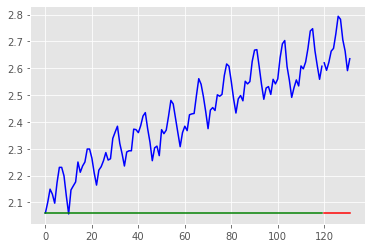

In [27]:
import numpy
#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)

x2 = numpy.arange(0, 120, 1)

x3 = numpy.arange(120, 132, 1)


plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train, color='green')

plt.plot(x3, y_test, color='blue')

plt.plot(x3, predictions, color='red')



Есть прогноз для логарифма, нет прогноза для исходного ряда.
Нет окончательного графика.
Нет спрогнозированных значений
Доделать

Создадаим индикаторы месяцев и добавим в датасет

In [28]:
#  Переменная время
ser_g['month_num'] = range(1, len(ser_g) + 1)

In [29]:
ser_g.head()

,date,series_g,log_y,month_num
0,JAN 1949,112,2.049218,1
1,FEB 1949,118,2.071882,2
2,MAR 1949,132,2.120574,3
3,APR 1949,129,2.110590,4
4,MAY 1949,121,2.082785,5


In [30]:
ser_g_2 = ser_g.drop(columns=["date", "series_g"])

In [31]:
ser_g_2.head()

,log_y,month_num
0,2.049218,1
1,2.071882,2
2,2.120574,3
3,2.110590,4
4,2.082785,5


In [32]:

ser_g_2["m01"] = [1,0,0,0,0,0,0,0,0,0,0,0]*12
ser_g_2["m02"] = [0,1,0,0,0,0,0,0,0,0,0,0]*12
ser_g_2["m03"] = [0,0,1,0,0,0,0,0,0,0,0,0]*12
ser_g_2["m04"] = [0,0,0,1,0,0,0,0,0,0,0,0]*12
ser_g_2["m05"] = [0,0,0,0,1,0,0,0,0,0,0,0]*12
ser_g_2["m06"] = [0,0,0,0,0,1,0,0,0,0,0,0]*12
ser_g_2["m07"] = [0,0,0,0,0,0,1,0,0,0,0,0]*12
ser_g_2["m08"] = [0,0,0,0,0,0,0,1,0,0,0,0]*12
ser_g_2["m09"] = [0,0,0,0,0,0,0,0,1,0,0,0]*12
ser_g_2["m10"] = [0,0,0,0,0,0,0,0,0,1,0,0]*12
ser_g_2["m11"] = [0,0,0,0,0,0,0,0,0,0,1,0]*12
ser_g_2["m12"] = [0,0,0,0,0,0,0,0,0,0,0,1]*12

In [33]:
ser_g_2.head(14)

,log_y,month_num,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,2.049218,1,1,0,0,0,0,0,0,0,0,0,0,0
1,2.071882,2,0,1,0,0,0,0,0,0,0,0,0,0
2,2.120574,3,0,0,1,0,0,0,0,0,0,0,0,0
3,2.110590,4,0,0,0,1,0,0,0,0,0,0,0,0
4,2.082785,5,0,0,0,0,1,0,0,0,0,0,0,0
5,2.130334,6,0,0,0,0,0,1,0,0,0,0,0,0
6,2.170262,7,0,0,0,0,0,0,1,0,0,0,0,0
7,2.170262,8,0,0,0,0,0,0,0,1,0,0,0,0
8,2.133539,9,0,0,0,0,0,0,0,0,1,0,0,0
9,2.075547,10,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:

#  предикторы и отклик разделяем

#  Создаем матрицу (столбец) откликов.
y = ser_g_2['log_y']

#  Создаем матрицу предикторов.
X = ser_g_2.drop(columns=["log_y"])

In [35]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:120]
y_train = y[:120]
X_test  = X[120:]
y_test  = y[120:]

In [36]:
print(ser_g_2.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(144, 14)
(120, 13)
(120,)
(24, 13)
(24,)


In [37]:
print(X_train.head(5))

   month_num  m01  m02  m03  m04  m05  m06  m07  m08  m09  m10  m11  m12
0          1    1    0    0    0    0    0    0    0    0    0    0    0
1          2    0    1    0    0    0    0    0    0    0    0    0    0
2          3    0    0    1    0    0    0    0    0    0    0    0    0
3          4    0    0    0    1    0    0    0    0    0    0    0    0
4          5    0    0    0    0    1    0    0    0    0    0    0    0


In [38]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [50]:
input_dim = X_train.shape[1] # number of columns

from keras.layers import LSTM

def create_model():
    # default values
    activation='relu' # or linear
    dropout_rate=0.0 # or 0.2
    init_mode='uniform'
    weight_constraint=0 # or  4
    optimizer='adam' # or SGD
    lr = 0.01
    momemntum=0
    # create model
    model = Sequential()
    model.add(LSTM(4, input_shape=(1,1)))
#     model.add(Dense(8, 
#                     input_dim=input_dim, kernel_initializer=init_mode, 
#                     activation=activation,
#                     kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=1000, epochs=10) 
# use verbose=0 if you do not want to see progress

In [41]:

# print(input_dim) # 23
########################################################
# Use scikit-learn to grid search 
activation =  ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'] # softmax, softplus, softsign 
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
weight_constraint=[1, 2, 3, 4, 5]
neurons = [1, 5, 10, 15, 20, 25, 30]
init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
##############################################################
# grid search epochs, batch size
epochs = [1, 10, 50, 100] # add 50, 100, 150 etc
batch_size = [1000, 5000] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train) 
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
##############################################################

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (120, 13)

In [53]:
#  Обучение нейронной сети 

model = Sequential()
model.add(LSTM(4, input_shape=(1,1)))
# model.add(Dense(8, input_dim=13, activation='sigmoid'))
# model.add(Dense(12, activation='sigmoid'))

model.add(Dense(1, activation='linear'))

# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])


# Training a model
model.fit(X_train, y_train, epochs=300, batch_size=7)
# model.fit(X_train, y_train, epochs=1, batch_size=1000)

ValueError: Error when checking input: expected lstm_4_input to have 3 dimensions, but got array with shape (120, 13)

In [ ]:
# оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

In [ ]:

# Вычисляем прогноз
predictions = model.predict(X_test)
# round predictions
# rounded = [round(x[0]) for x in predictions]
# print(rounded)

In [ ]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [ ]:

# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(predictions_train.shape)
print(predictions.shape)

In [44]:
predictions_train2 = predictions_train[:,0]
predictions2 = predictions[:,0]

In [45]:
#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)

x2 = np.arange(0, 120, 1)

x3 = np.arange(120, 132, 1)

In [46]:
y_test.shape

(24,)

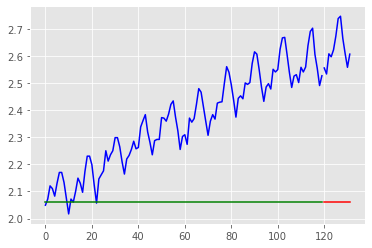

In [47]:
plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train2, color='green')

plt.plot(x3, y_test[:12], color='blue')

plt.plot(x3, predictions2[:12], color='red')

In [49]:
mean_absolute_error(predictions2, y_test[:12])

0.5660748659563812

In [102]:
mean_squared_error(predictions2, y_test)

0.0013369859998964492

In [103]:
mean_squared_error(predictions_train2, y_train)

0.0004254301512251555

In [104]:
mean_absolute_error(predictions_train2, y_train)

0.0160559848991722